In [1]:
import numpy as np
from scipy.linalg import svd
from PIL import Image
import matplotlib.pyplot as plt

In [9]:
def get_image_feature(src, p, s, q, rate=0.1, all_info=True):
    m, n = src.size
    if all_info:
        k = m * n * rate / (m + n + 1)
    else:
        k = m * rate
    s_temp = np.zeros(m)
    s_temp[:int(k)] = s[:int(k)]
    s = s_temp * np.identity(s.shape[0]) # 只能获取方阵，标准意义上的单位矩阵，这也是和eye的区别之处
    
    temp = np.dot(p, s)
    temp = np.dot(temp, q)
#     print(src - temp)
    return temp

In [10]:
image = Image.open('imgs/svd.png').convert('L')

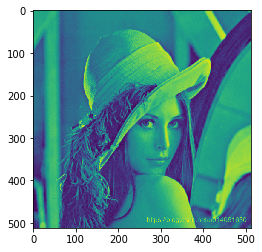

In [11]:
plt.imshow(image)

In [12]:
p, s, q = svd(image, full_matrices=True)

In [13]:
p.shape, s.shape, q.shape, image.size

((512, 512), (512,), (512, 512), (512, 512))

In [14]:
def show_ret(images, labels):
    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img, cmap=plt.cm.gray, interpolation='nearest')
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()

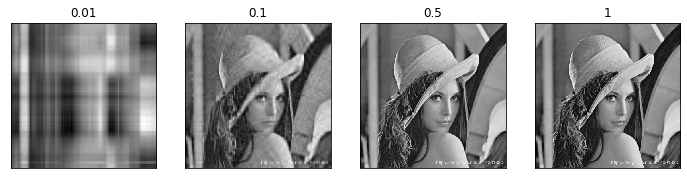

In [16]:
X, y = [], []
for i in [0.01, 0.1, 0.5, 1]:
    X.append(get_image_feature(image, p, s, q, rate=i)) # 将第i个feature加到X中
    y.append(i) # 将第i个label加到y中
show_ret(X, y)

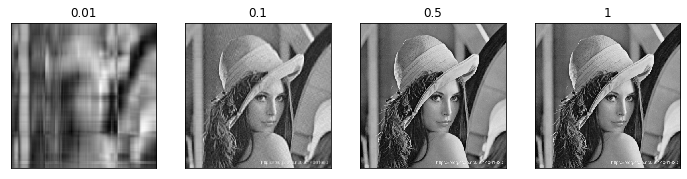

In [18]:
X, y = [], []
for i in [0.01, 0.1, 0.5, 1]:
    X.append(get_image_feature(image, p, s, q, rate=i, all_info=False)) # 将第i个feature加到X中
    y.append(i) # 将第i个label加到y中
show_ret(X, y)